# EDA

** NB: ** Set the argument `output_image` of the plotting functions to `False` when running the notebook to have interactive plots (some have a dropdown that allows to choose the province/region)

In [1]:
import pandas as pd
import numpy as np

from IPython.core.display import HTML

from pathlib import Path

import sys
sys.path.insert(0, os.path.abspath('../src'))

from utils import *
from plots import *

In [2]:
data_path = "../data"

In [3]:
DataDownloader(data_path).download_all_csv()

In [4]:
covidpro_df, dpc_regioni_df, dpc_province_df, pop_prov_df, prov_list_df = load_data(data_path)

In [5]:
covidpro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26293 entries, 0 to 26292
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_prov         26293 non-null  int64         
 1   Province        26293 non-null  object        
 2   Date            26293 non-null  datetime64[ns]
 3   Deaths          26293 non-null  int64         
 4   Tot_deaths      26293 non-null  int64         
 5   New_cases       26293 non-null  int64         
 6   Curr_pos_cases  26293 non-null  int64         
 7   Region          26293 non-null  object        
 8   id_reg          26293 non-null  int64         
 9   NP_R            26293 non-null  float64       
 10  DR              26293 non-null  float64       
 11  NP_R_Rolling    26293 non-null  float64       
 12  DR_Rolling      26293 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 2.6+ MB


In [6]:
covidpro_df.head()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg,NP_R,DR,NP_R_Rolling,DR_Rolling
0,84,Agrigento,2020-02-24,0,0,0,0,Sicilia,19,0.0,0.0,0.0,0.0
1,6,Alessandria,2020-02-24,0,0,0,0,Piemonte,1,0.0,0.0,0.0,0.0
2,42,Ancona,2020-02-24,0,0,0,0,Marche,11,0.0,0.0,0.0,0.0
3,7,Aosta,2020-02-24,0,0,0,0,Valle d'Aosta,2,0.0,0.0,0.0,0.0
4,51,Arezzo,2020-02-24,0,0,0,0,Toscana,9,0.0,0.0,0.0,0.0


In [7]:
covidpro_df.tail()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg,NP_R,DR,NP_R_Rolling,DR_Rolling
26288,2,Vercelli,2020-12-08,0,325,19,6779,Piemonte,1,0.002803,0.0,0.013111,0.000098
26289,23,Verona,2020-12-08,0,703,604,32312,Veneto,5,0.018693,0.0,0.014559,0.000000
26290,102,Vibo Valentia,2020-12-08,0,21,5,1072,Calabria,18,0.004664,0.0,0.012727,0.000000
26291,24,Vicenza,2020-12-08,0,600,584,30186,Veneto,5,0.019347,0.0,0.013979,0.000000
26292,56,Viterbo,2020-12-08,0,169,130,7421,Lazio,12,0.017518,0.0,0.012943,0.000000


In [10]:
df = covidpro_df.groupby(['Province'])[['Deaths', 'New_cases', "NP_R", "DR"]].agg(["min", "max", "mean"])
display(HTML(df.to_html()))

In [9]:
dpc_regioni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   data                          6090 non-null   datetime64[ns]
 1   stato                         6090 non-null   object        
 2   codice_regione                6090 non-null   int64         
 3   denominazione_regione         6090 non-null   object        
 4   lat                           6090 non-null   float64       
 5   long                          6090 non-null   float64       
 6   ricoverati_con_sintomi        6090 non-null   int64         
 7   terapia_intensiva             6090 non-null   int64         
 8   totale_ospedalizzati          6090 non-null   int64         
 9   isolamento_domiciliare        6090 non-null   int64         
 10  totale_positivi               6090 non-null   int64         
 11  variazione_totale_positivi    

In [11]:
dpc_regioni_df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note_test,note_casi,NC_R,NP_R,IC_R,Hosp_R,DR,NC_R_Rolling,IC_R_Rolling,totale_positivi_Rolling
0,2020-02-24,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2020-02-24,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2020-02-24,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,2020-02-24,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,2020-02-24,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0,0,0.121622,1.0,0.111111,0.666667,0.0,0.0,0.0,0.0


In [12]:
dpc_regioni_df.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note_test,note_casi,NC_R,NP_R,IC_R,Hosp_R,DR,NC_R_Rolling,IC_R_Rolling,totale_positivi_Rolling
6085,2020-12-09,ITA,19,Sicilia,38.115697,13.362357,1374,198,1572,37075,...,0,0,0.000719,0.019484,0.005123,0.040676,0.048206,0.000607,0.006189,25878.857143
6086,2020-12-09,ITA,9,Toscana,43.769231,11.255889,1347,253,1600,23005,...,Positivi diagnosticati solo con test antigenic...,0,0.000302,0.020524,0.010282,0.065027,0.120179,0.000630,0.007207,29031.428571
6087,2020-12-09,ITA,10,Umbria,43.106758,12.388247,323,56,379,5277,...,0,0,0.000201,0.015736,0.009901,0.067008,0.085926,0.000558,0.008228,28284.571429
6088,2020-12-09,ITA,2,Valle d'Aosta,45.737503,7.320149,90,13,103,753,...,0,0,0.000299,0.019860,0.015187,0.120327,0.400701,0.000536,0.007672,28047.428571
6089,2020-12-09,ITA,5,Veneto,45.434905,12.338452,2551,319,2870,78148,...,0,0,0.000831,0.029956,0.003937,0.035424,0.054346,0.000578,0.007519,30552.428571


In [13]:
dpc_regioni_df[dpc_regioni_df.denominazione_regione == "Lombardia"].tail().T

,5993,6014,6035,6056,6077
data,2020-12-05 00:00:00,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00
stato,ITA,ITA,ITA,ITA,ITA
codice_regione,3,3,3,3,3
denominazione_regione,Lombardia,Lombardia,Lombardia,Lombardia,Lombardia
lat,45.4668,45.4668,45.4668,45.4668,45.4668
long,9.19035,9.19035,9.19035,9.19035,9.19035
ricoverati_con_sintomi,6554,6372,6362,6187,5727
terapia_intensiva,805,807,781,767,766
totale_ospedalizzati,7359,7179,7143,6954,6493
isolamento_domiciliare,108397,109200,108857,104875,83410


In [ ]:
cols = ['ricoverati_con_sintomi', 'terapia_intensiva','totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 'nuovi_positivi', 'dimessi_guariti','deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening','totale_casi', 'tamponi', 'casi_testati', 'NC_R', 'NP_R','IC_R', 'Hosp_R', 'DR', 'NC_R_Rolling', 'IC_R_Rolling','totale_positivi_Rolling']

In [ ]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=cols,
                    legend_titles=None,
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=False,
                    blend_legend=False)

In [16]:
df = dpc_regioni_df.groupby(['denominazione_regione'])[['totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', "totale_positivi", "isolamento_domiciliare", "dimessi_guariti", "deceduti", "tamponi", "casi_testati"]].agg(["min", "max", "mean"])

display(HTML(df.to_html()))

In [17]:
dpc_province_df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,0
1,2020-02-24,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,0
2,2020-02-24,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,0
3,2020-02-24,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,0
4,2020-02-24,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,0,0.000000,0.000000,0,0


In [18]:
dpc_province_df.tail()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
40643,2020-12-09,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,25531,0
40644,2020-12-09,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,32472,0
40645,2020-12-09,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,4833,0
40646,2020-12-09,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,0,0.000000,0.000000,2953,0
40647,2020-12-09,ITA,5,Veneto,999,In fase di definizione/aggiornamento,0,0.000000,0.000000,405,0


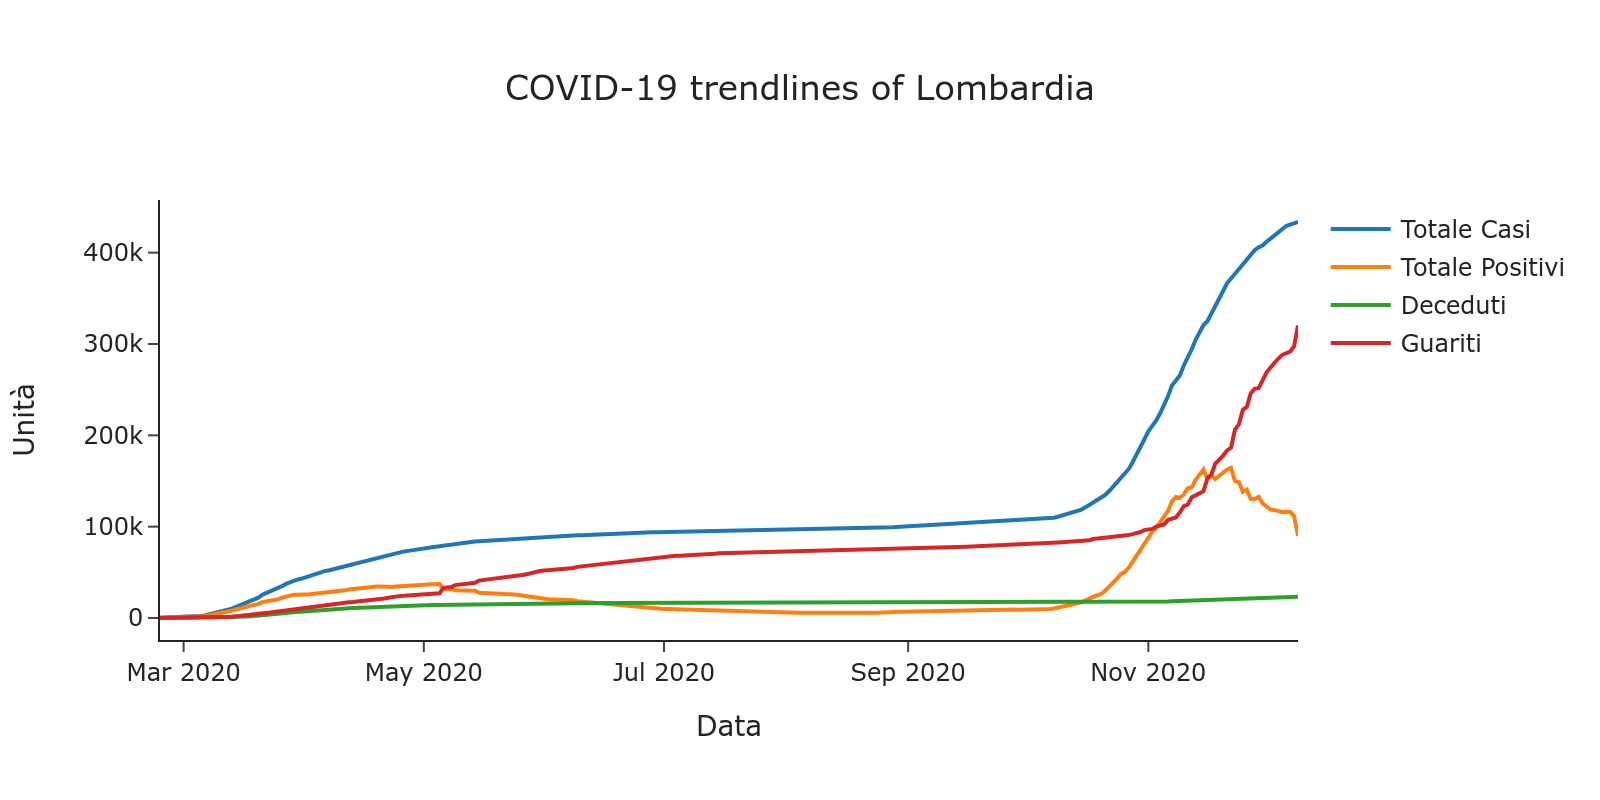

In [19]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_casi', 'totale_positivi', 'deceduti', 'dimessi_guariti'],
                    legend_titles=['Totale Casi', 'Totale Positivi', 'Deceduti', 'Guariti'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True)

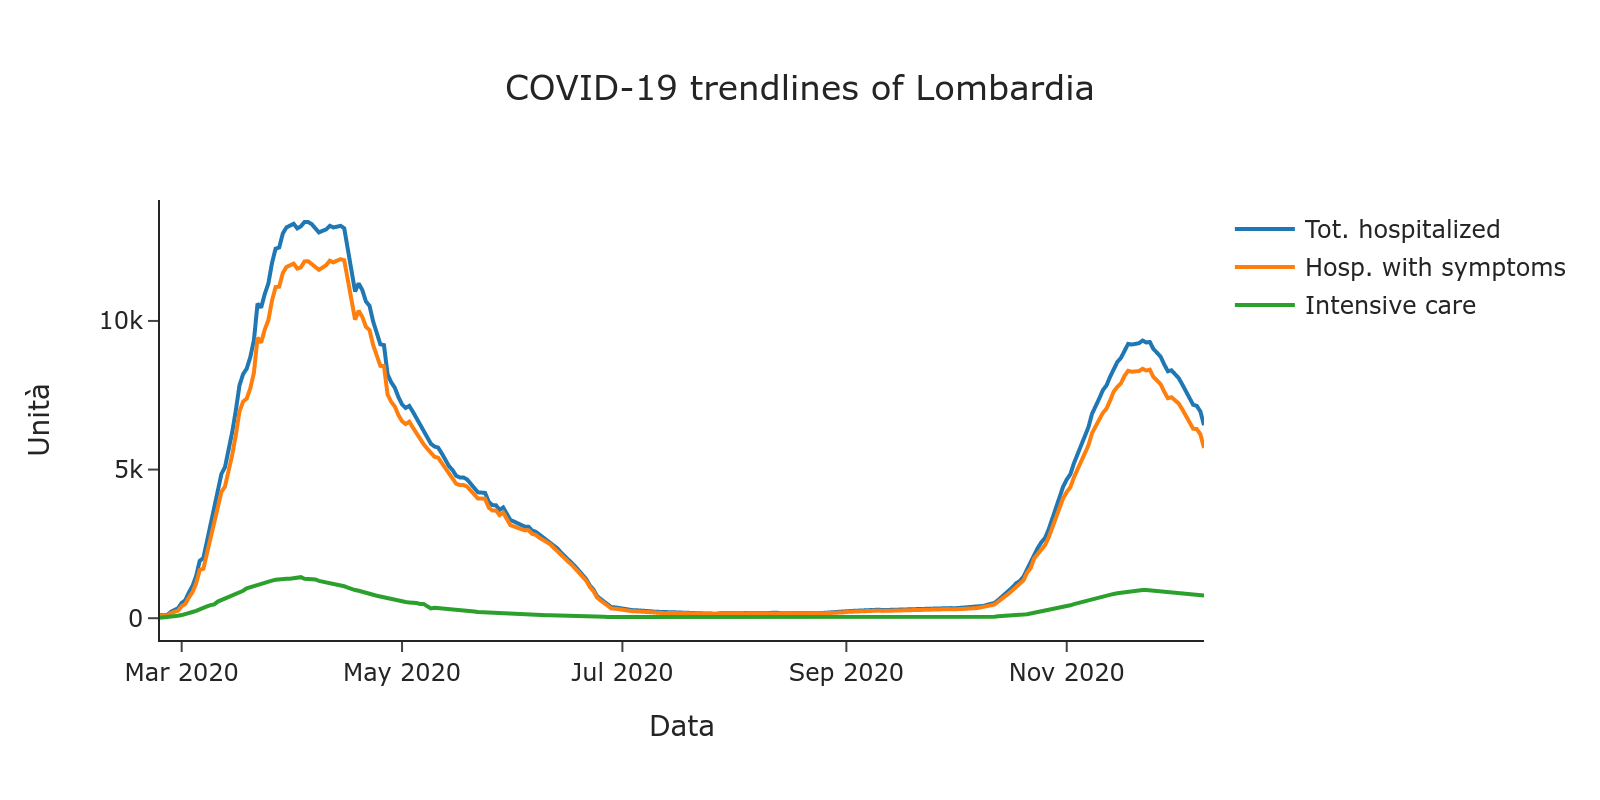

In [20]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva'],
                    legend_titles=['Tot. hospitalized', 'Hosp. with symptoms', 'Intensive care'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

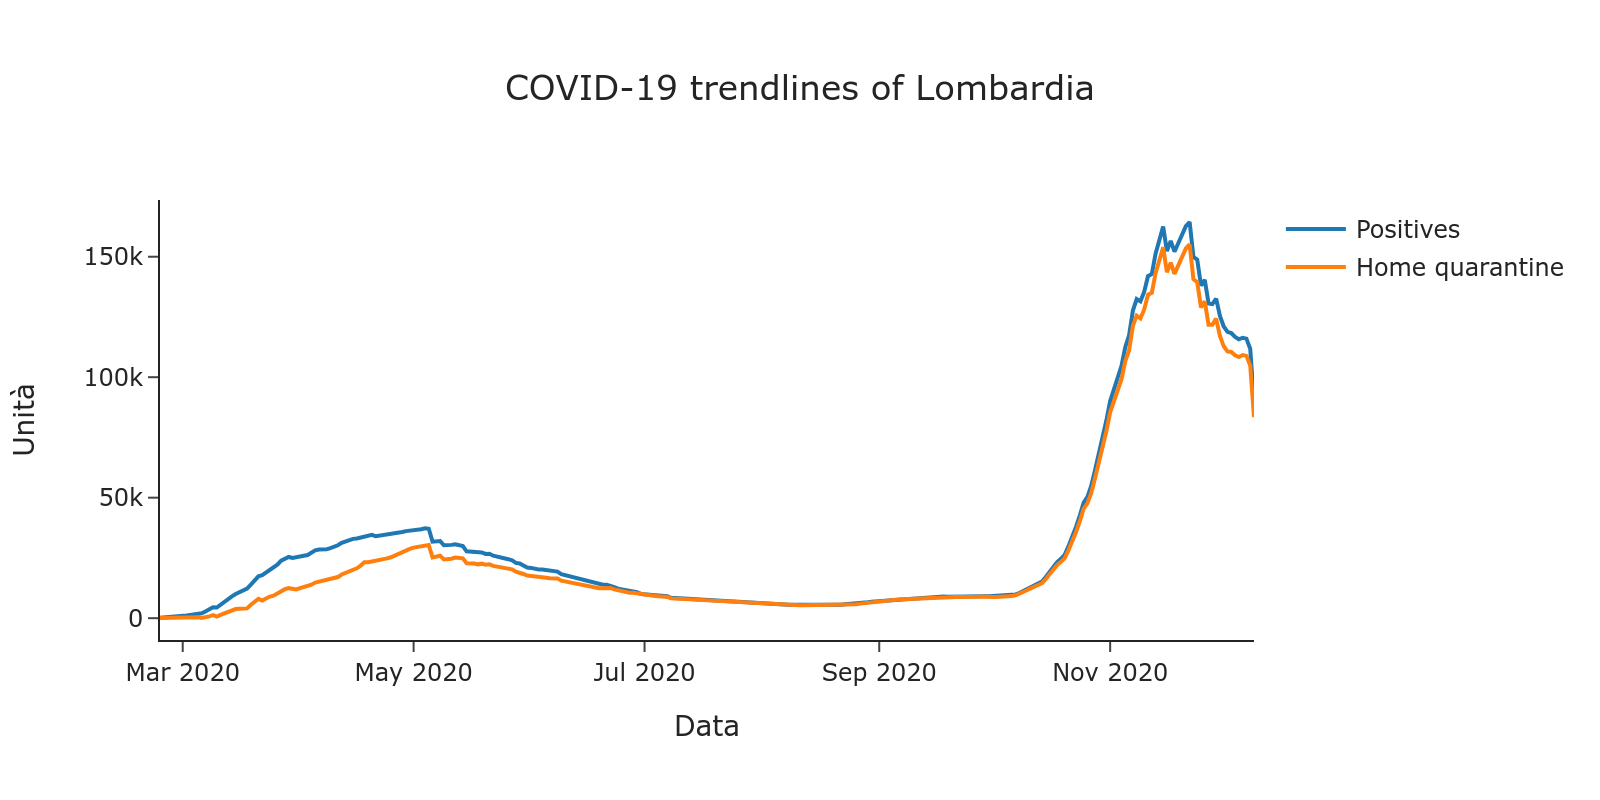

In [21]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_positivi', 'isolamento_domiciliare'],
                    legend_titles=['Positives', 'Home quarantine'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

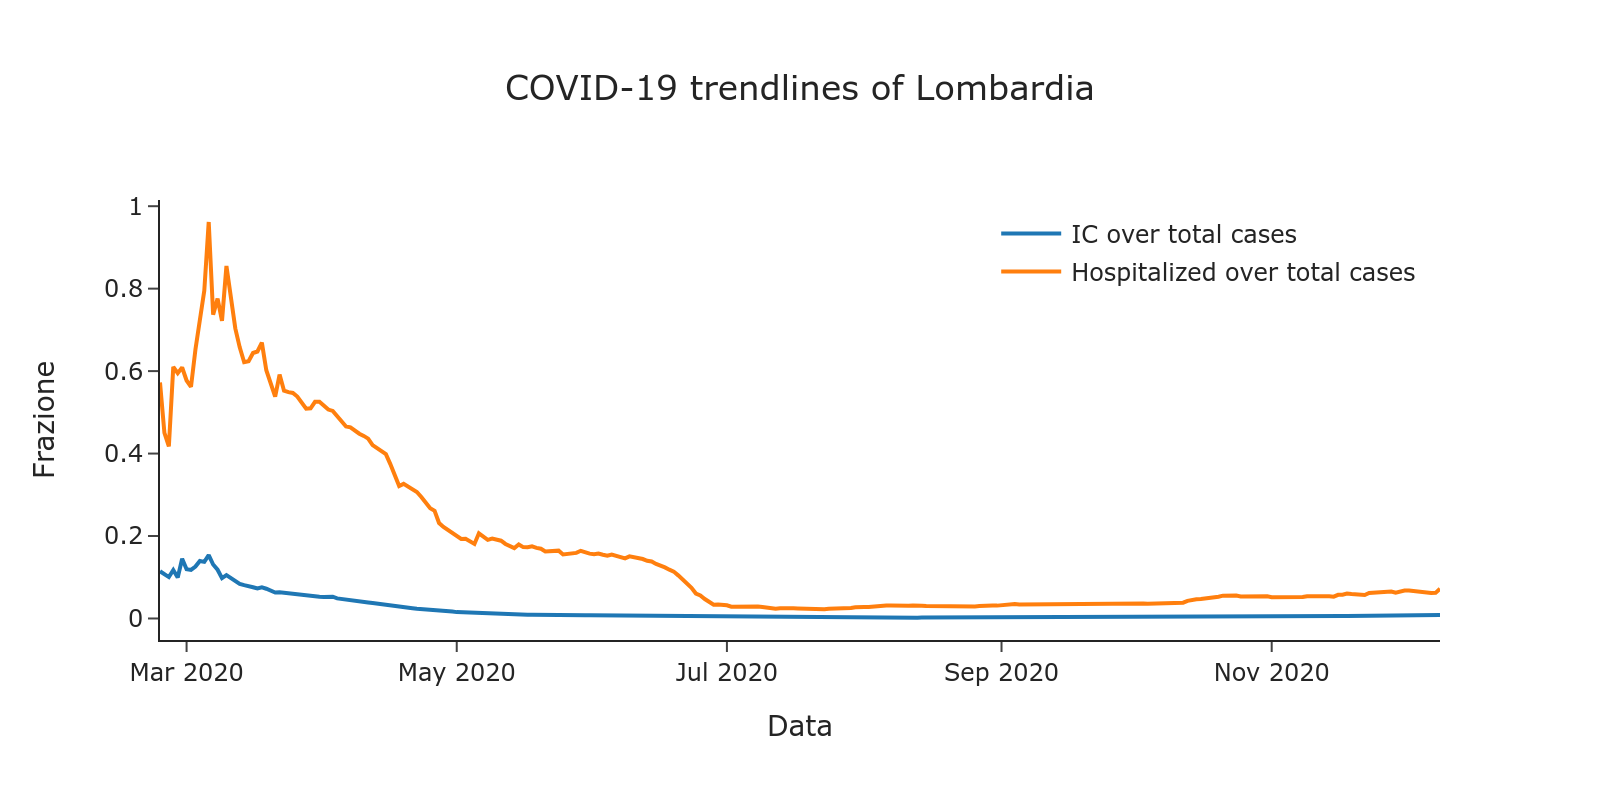

In [22]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['IC_R', 'Hosp_R'],
                    legend_titles=['IC over total cases', 'Hospitalized over total cases'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

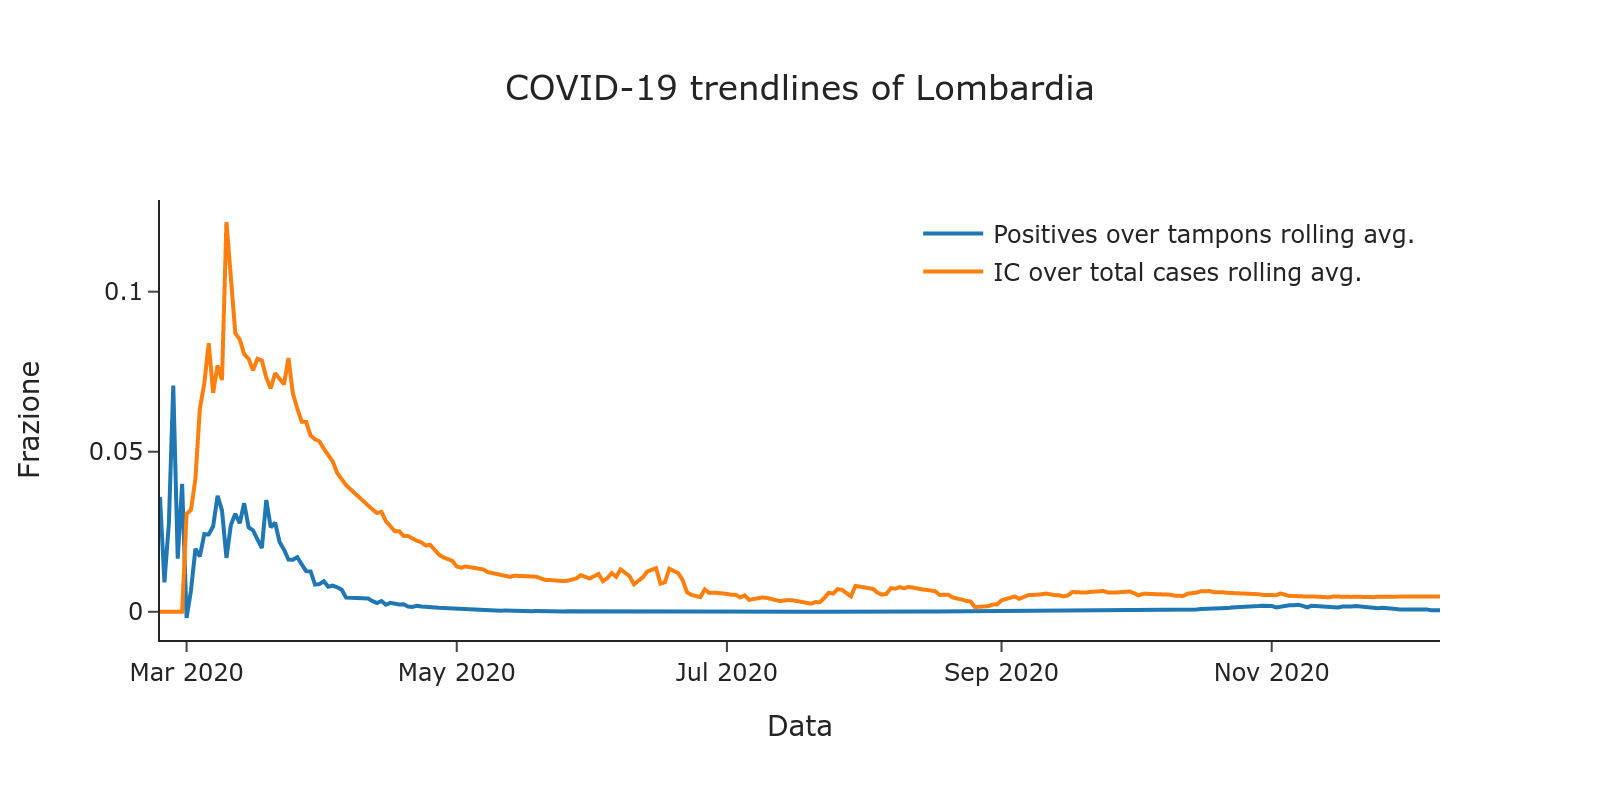

In [23]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R_Rolling', 'IC_R_Rolling'],
                    legend_titles=['Positives over tampons rolling avg.', 'IC over total cases rolling avg.'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

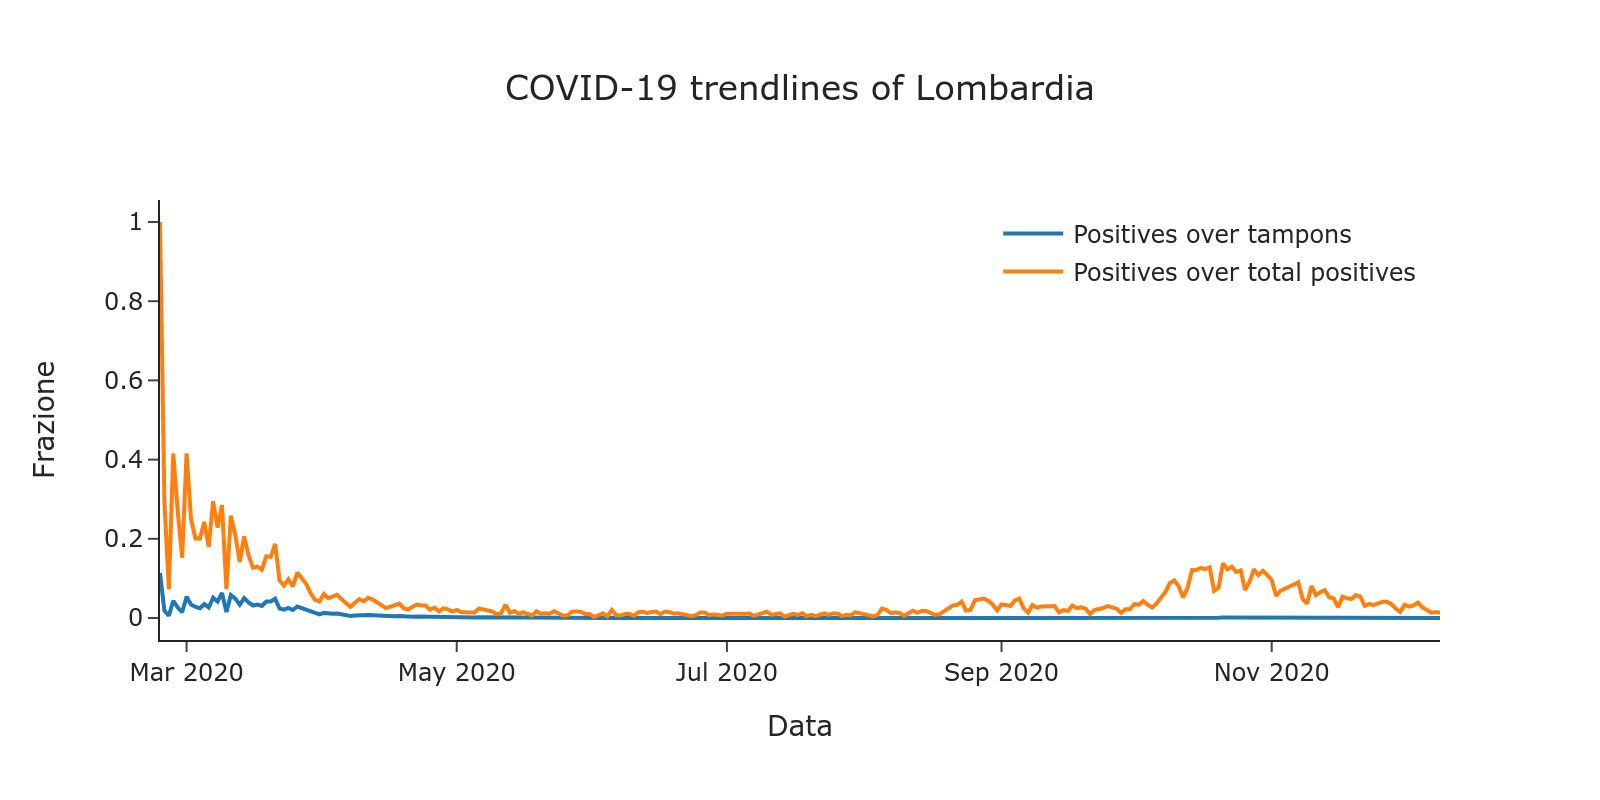

In [24]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R', 'NP_R'],
                    legend_titles=['Positives over tampons', 'Positives over total positives'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

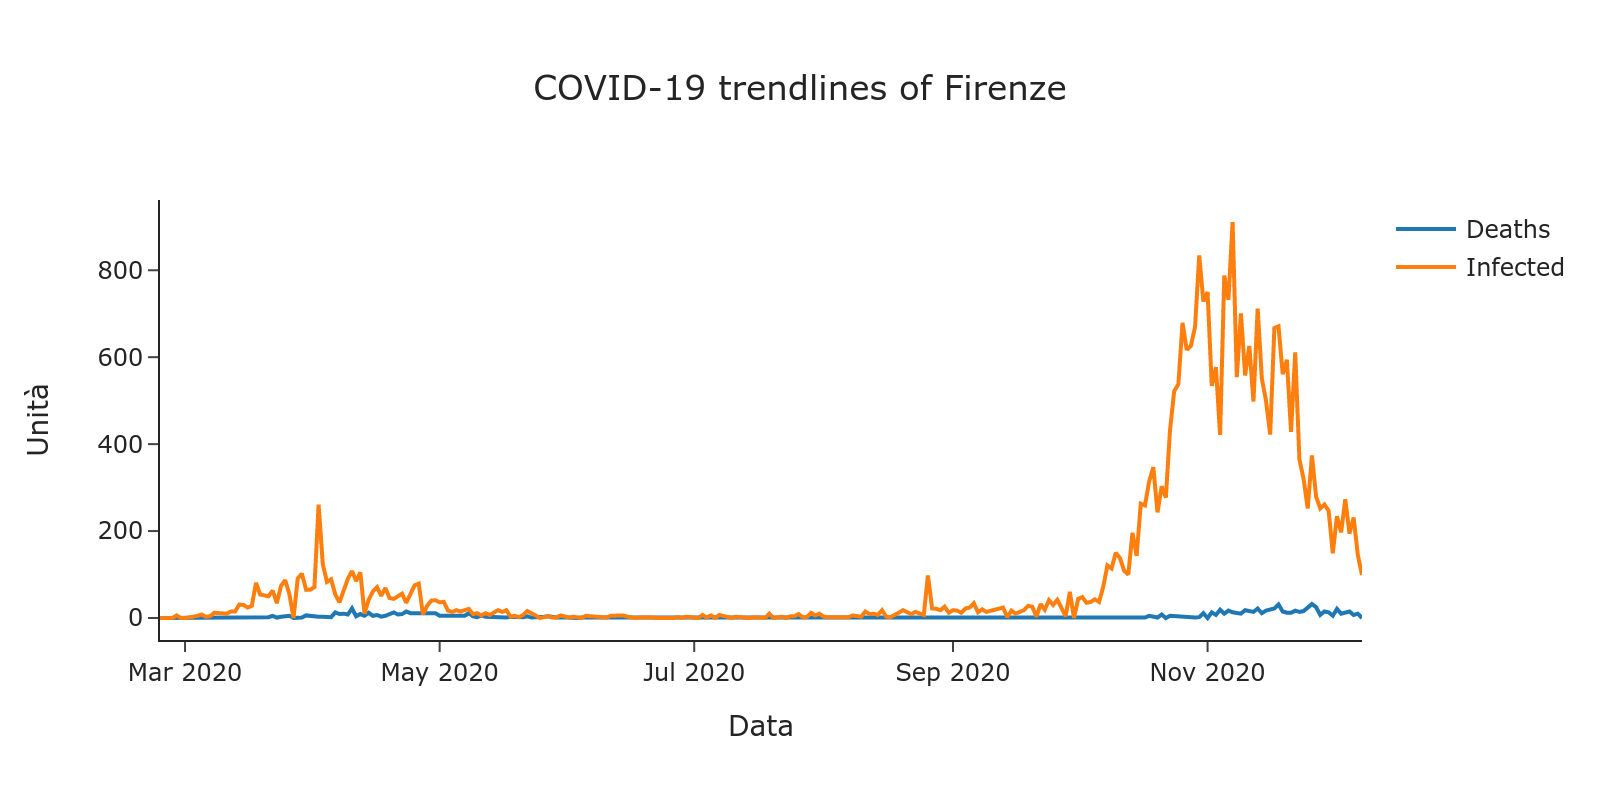

In [25]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Deaths', 'New_cases'],
                    legend_titles=['Deaths', 'Infected'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

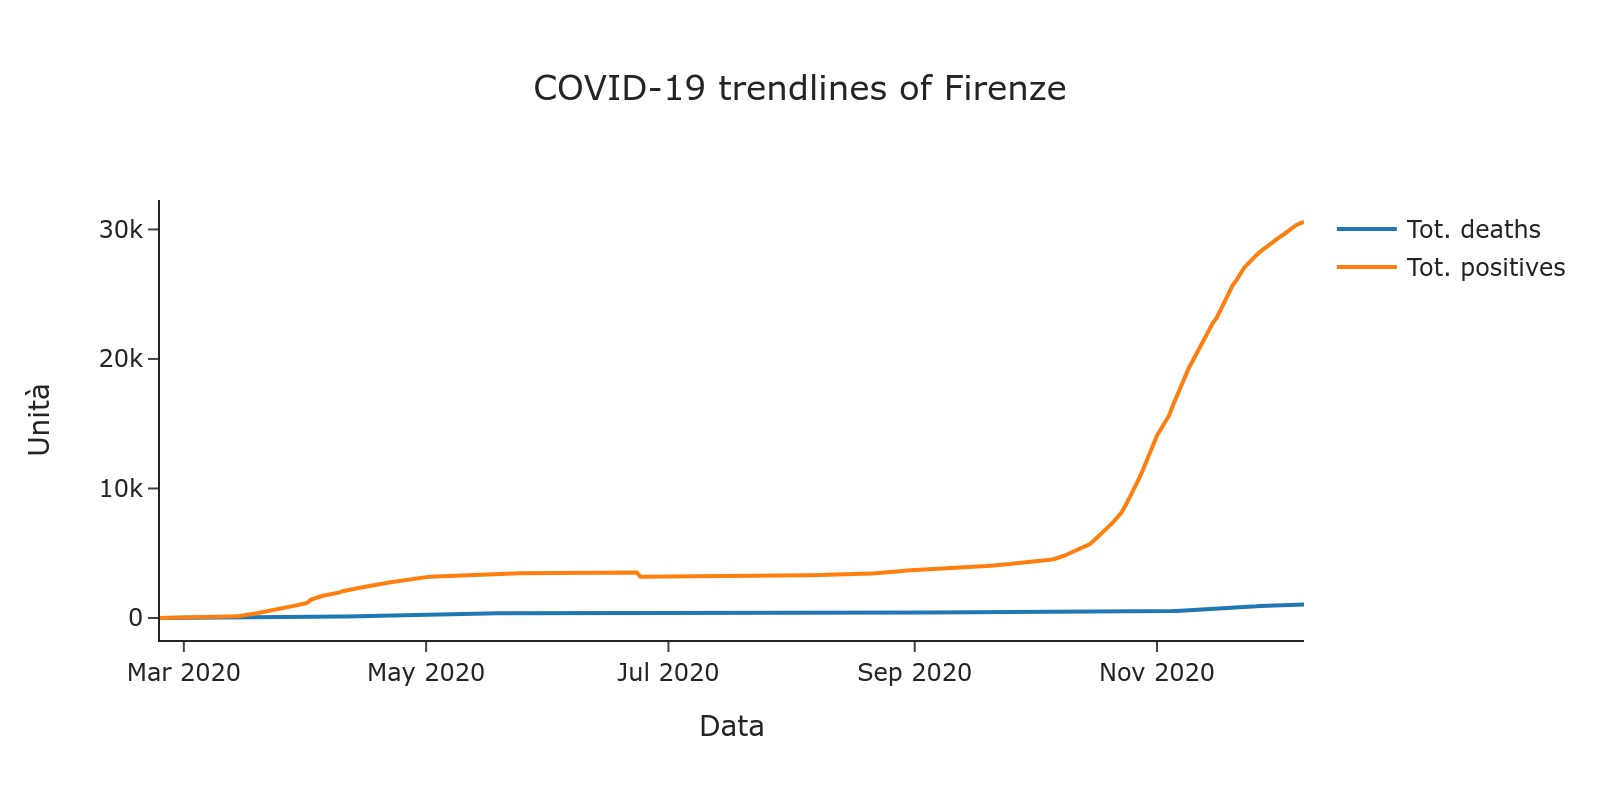

In [26]:
inter_dropdown_plot(options=covidpro_df.Province.unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Tot_deaths', 'Curr_pos_cases'],
                    legend_titles=['Tot. deaths', 'Tot. positives'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

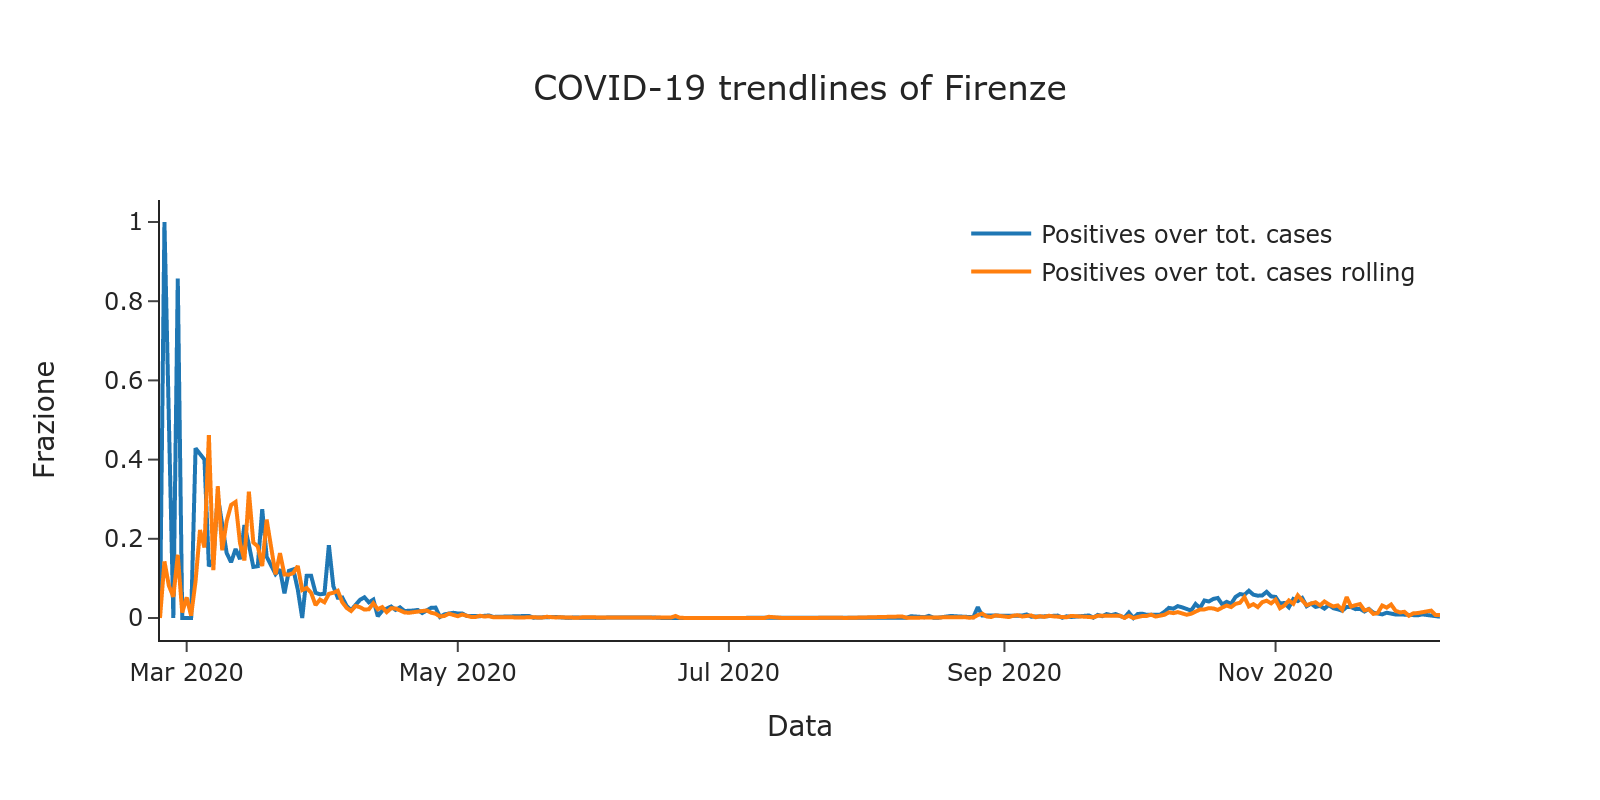

In [27]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['NP_R', 'NP_R_Rolling'],
                    legend_titles=['Positives over tot. cases', 'Positives over tot. cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

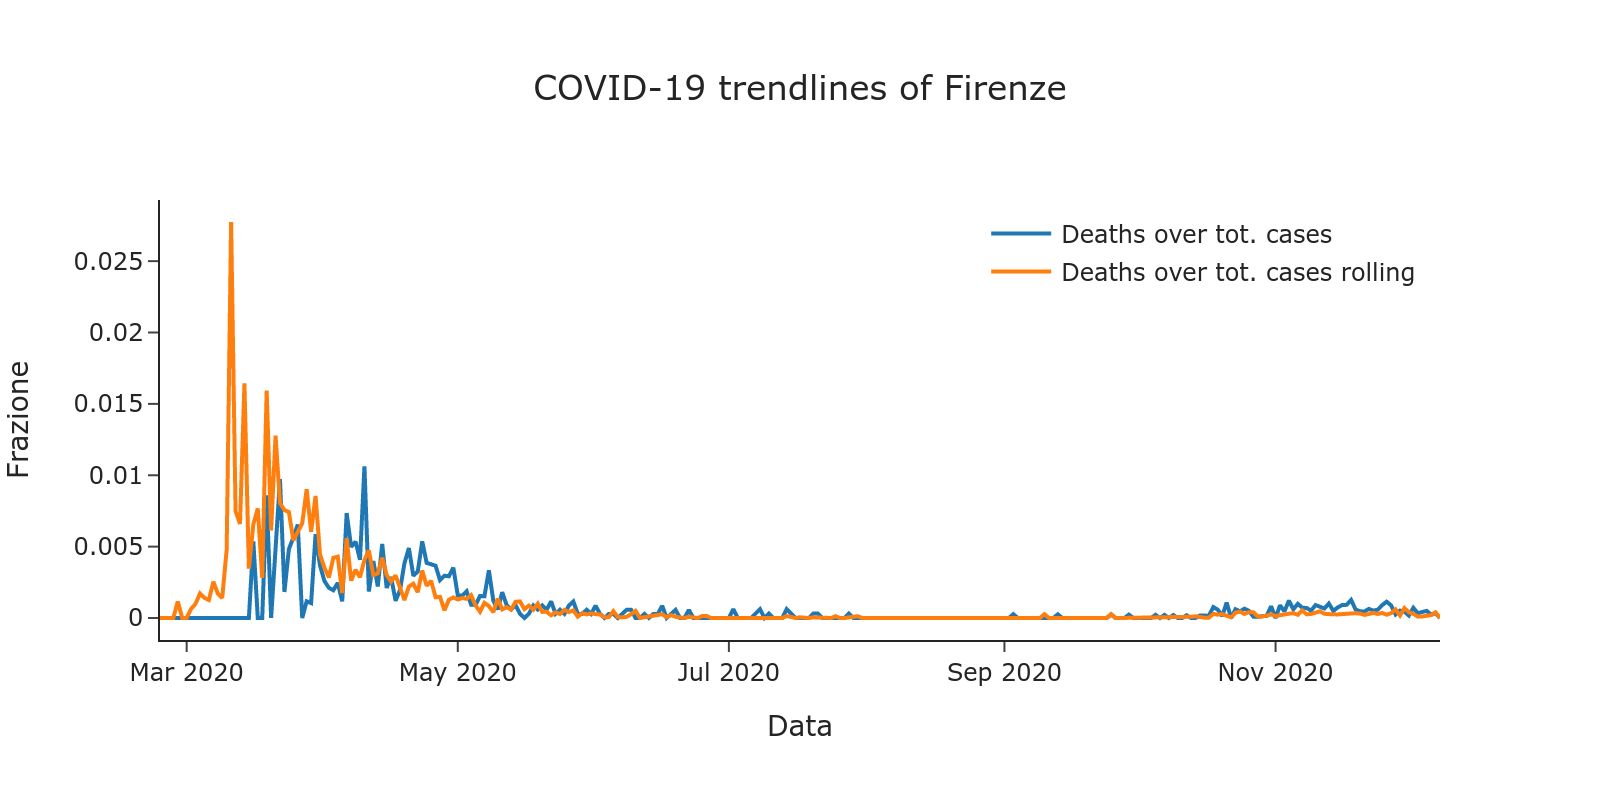

In [28]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['DR', 'DR_Rolling'],
                    legend_titles=['Deaths over tot. cases', 'Deaths over tot. cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)